## Import packages

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import masw_functions as mf
import pickle
import os
import subprocess
%matplotlib inline

## Read data

Read the file **dispersion_1000.pkl** with the list of dispersion analysis by azimuth of shot **1000**

In [2]:
filenames=["vs2d_1000.pkl"]
for filename in filenames:
    if os.path.isfile(filename):
        print(filename+" exists.")
    else: 
        url = 'https://filedn.com/lEzjnrJwSG47nSDwzIitUuf'
        folder='/Data/swi_python/'
        command = ['wget', url+folder+filename]
        subprocess.run(command)

with open(filenames[0], 'rb') as f:
    vs2d = pickle.load(f)

vs2d_1000.pkl exists.


Text(0, 0.5, 'Depth (m)')

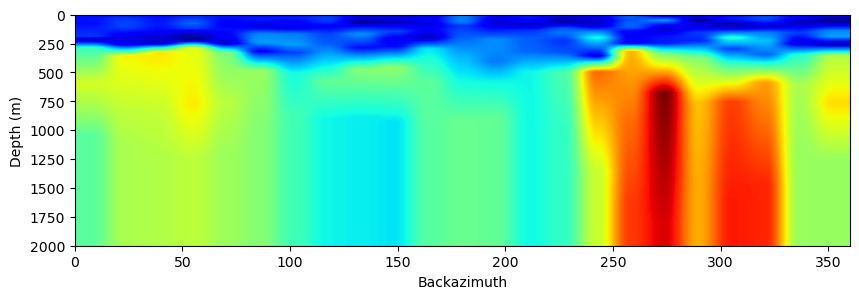

In [3]:
plt.rcParams['figure.figsize'] = [10, 3]
cmap = plt.get_cmap('jet', 12)
plt.imshow(vs2d, aspect='auto', cmap='jet', origin='upper', extent=[0, 360, 2000, 0])
plt.xlabel('Backazimuth')
plt.ylabel('Depth (m)')

In [19]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

theta = np.deg2rad(np.linspace(0, 360, 23))  # Angle in radians
z = np.linspace(0, 2000, 201) 

# Create a meshgrid for theta and z
Theta, Z = np.meshgrid(theta, z)

# Convert polar coordinates (r, theta, z) to Cartesian coordinates (x, y, z + amplitude)
r_cylinder = 2
X = r_cylinder * np.cos(theta)
Y = r_cylinder * np.sin(theta)

# Create r and theta values for the top surface (a disk)
r_top = np.linspace(0, r_cylinder, 100)  # Radial values from 0 to the cylinder radius
r_top, Theta_top = np.meshgrid(r_top, theta)
# Convert polar coordinates to Cartesian for the circular top
X_top = r_top * np.cos(Theta_top)
Y_top = r_top * np.sin(Theta_top)
Z_top = np.full_like(X_top, 0)  # Constant Z (top of the cylinder)
vs2d_top = np.tile(vs2d[0,:].T, (100, 1)).T

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with color representing amplitude
surface = ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(vs2d / np.max(vs2d)), rstride=1, cstride=1, shade=False)

# Add color bar to represent amplitude values
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(vs2d)
plt.colorbar(m, ax=ax, label='Amplitude')
ax.set_zlim(2000, 0)

# Add labels to the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth (m)')

# Plot the circular surface (top of the cylinder)
ax.plot_surface(X_top, Y_top, Z_top, facecolors=plt.cm.jet(vs2d_top / np.max(vs2d)), rstride=1, cstride=1, shade=False)  # Light blue top


# Show the plot
plt.show()

In [9]:
X_top.shape

(23, 100)

In [17]:
vs2d_top.shape

(100, 23)